# Running Llava: a large multi-modal model on Google Colab

Run Llava model on a Google Colab!

Llava is a multi-modal image-text to text model that can be seen as an "open source version of GPT4". It yields to very nice results as we will see in this Google Colab demo.

![image/png](https://cdn-uploads.huggingface.co/production/uploads/62441d1d9fdefb55a0b7d12c/FPshq08TKYD0e-qwPLDVO.png)

The architecutre is a pure decoder-based text model that takes concatenated vision hidden states with text hidden states.

We will leverage QLoRA quantization method and use `pipeline` to run our model.

In [ ]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 34.2 MB/s eta 0:00:00


## Load an image

Let's use the image that has been used for Llava demo

And ask the model to describe that image!

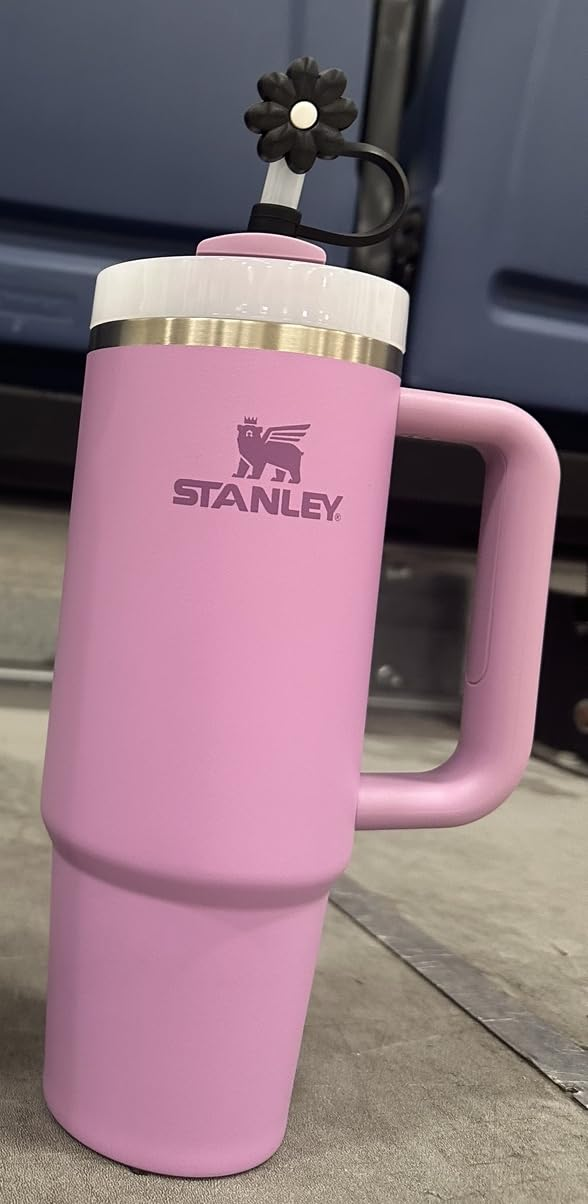

In [ ]:
import requests
from PIL import Image

image_url = "https://llava-vl.github.io/static/images/view.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

rating_1 = "https://m.media-amazon.com/images/I/71H4Ga0rSlL._SL1600_.jpg"
rating_1_img = Image.open(requests.get(rating_1, stream=True).raw)
rating_1_img

rating_2 = "https://m.media-amazon.com/images/I/81bYKENRt6L._SL1600_.jpg"
rating_2_img = Image.open(requests.get(rating_2, stream=True).raw)
rating_2_img

rating_3 = "https://m.media-amazon.com/images/I/51+hlBjHavL.jpg"
rating_3_img = Image.open(requests.get(rating_3, stream=True).raw)
rating_3_img


rating_4 = "https://m.media-amazon.com/images/I/81Vf6GMB5tL._SL1600_.jpg"
rating_4_img = Image.open(requests.get(rating_4, stream=True).raw)
rating_4_img

rating_5 = "https://m.media-amazon.com/images/I/61+VlRu6lOL.jpg"
rating_5_img = Image.open(requests.get(rating_5, stream=True).raw)
rating_5_img

test_image_link = "https://m.media-amazon.com/images/I/61YiFK5bevL.jpg"
test_img = Image.open(requests.get(test_image_link, stream=True).raw)
test_img

test_img_2 = 'https://m.media-amazon.com/images/I/51OY5fZFjTL._SL1600_.jpg'
test_img_2 = Image.open(requests.get(test_img_2, stream=True).raw)
test_img_2


## Preparing the quantization config to load the model in 4bit precision

In order to load the model in 4-bit precision, we need to pass a `quantization_config` to our model. Let's do that in the cells below

In [ ]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

## Load the model using `pipeline`

We will leverage the `image-to-text` pipeline from transformers !

In [ ]:
from transformers import pipeline

model_id = "llava-hf/bakLlava-v1-hf"

# model = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-34b-hf")

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.89G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/934M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

It is important to prompt the model wth a specific format, which is:
```bash
USER: <image>\n<prompt>\nASSISTANT:
```

In [ ]:
max_new_tokens = 25
prompt = """USER: ******
CONTEXT: You are a expert review classifier tasked with categorizing reviews on Amazon products, assigning ratings ranging from 1 to 5 stars. Identify the sentiment of the review, and check the image for its condition, like damages, etc. Below are sample reviews to provide context for your classification task:

Review 1:
Product - Pixel z
Review - The Google Pixel 8 presents a sleek design and sturdy construction. However, I encountered performance issues with software tuning, particularly noticeable with apps like YouTube freezing or stuttering. Given Google's control over hardware and software, this underperformance is disappointing. Despite subsequent updates, initial performance falls short of expectations for an 8th generation device. Rating - 3 stars

Review 2:
Product - Pixel z
Review - Transitioning from a Pixel 3 XL to the Pixel 8, I'm delighted with the enhancements and new features. Notably, the integration of AI and the exceptional camera elevate daily use. While the protruding camera design is a minor drawback, overall, the device impresses. Rating - 5 stars

Review 3:
Product - Protein Powder
Review - Regrettably, this protein powder fails to mix well, resulting in a poor texture despite following instructions. While the taste remains satisfactory, the decline in mixability compared to previous versions prompts disappointment, leading me to revert to my previous brand. Rating - 2 stars

Review 4:
Product - Protein Shake
Review - Encountered an unexpected chunky, plastic-like film in the shake, a stark departure from my previous experiences with this product. Presumably, this batch is defective, as such issues were never encountered before. Rating - 1 star

Review 5:
Product - Dumbbell
Review - These dumbbells complement my home workout regimen excellently. Surpassing my expectations in terms of color and quality, they are reasonably priced. I highly recommend them for light workouts. Rating - 5 stars
TASK:

User Review - I think this is a great option for staying hydrated throughout the day if you work long hours at a desk and don't want to get up frequently to refill your cup with water or ice. It does keep the ice cold for a long time, as long as you put a lot of cubes in there to start with. I usually toss at least 8 or 9 cubes in, or around 1/3 of the cup.

It is quite large and unweildy and leaks quite easily, so personally I wouldn't really carry it around anywhere outside the house, except for car errands. If you are driving and running errands, it fits well in a cup holder.

The straw is easy to sip from, and so it can be quite soothing to sip some ice cold water while working and focusing on something.

The bottom of the cup is kind of loud when you put it on the table, so I got a silicone boot/coaster for it, and to protect that lead pellet from any sort of damage! lol If you have a wobbily surface, it will tip over and start leaking! It's a little top heavy by design.

I've found it pretty easy to clean. It hasn't gotten dirty very easily. I only use it for water.

While the product doesn't really blow my mind, it is aesthetically pleasing and gets the job done. It's a little pick me up or a shiny object to look at on your desk while you are working. It does come in handy for long work days.

image - <image>
rate this review give only the number from 1 to 5, lean more on the postive side unless damage is mentioned:
ASSISTANT:"""

outputs = pipe(images = test_img_2, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})


In [ ]:
print(outputs[0]["generated_text"][-1:])

4


The model has managed to successfully describe the image with accurate result ! We also support other variants of Llava, such as [`bakLlava`](https://huggingface.co/llava-hf/bakLlava-v1-hf) which should be all posted inside the [`llava-hf`](https://huggingface.co/llava-hf) organization on 🤗 Hub